In [1]:
import os 
from glob import glob 
import matplotlib.pyplot as plt 
import geopandas as gpd 
import rasterio as rio 
import xarray as xr 
import rioxarray as rxr 
import numpy as np 
import earthpy as et 
import earthpy.spatial as es 
import earthpy.plot as ep 
from shapely.geometry import mapping

In [2]:
os.chdir(os.path.join(et.io.HOME, "earth-analytics", "data"))

In [3]:
landsat_post_fire_path = os.path.join("cold-springs-fire", "landsat_collect", "LC080340322016072301T1-SC20180214145802", "crop")

landsat_post_fire_path

'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop'

In [4]:
os.listdir(landsat_post_fire_path)

['LC08_L1TP_034032_20160723_20180131_01_T1_pixel_qa_crop.tif',
 'LC08_L1TP_034032_20160723_20180131_01_T1_sr_aerosol_crop.tif',
 'LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif',
 'LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'LC08_L1TP_034032_20160723_20180131_01_T1_sr_band6_crop.tif',
 'LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'LC08_L1TP_034032_20160723_20180131_01_T1_radsat_qa_crop.tif',
 'LC08_L1TP_034032_20160723_20180131_01_T1_sr_band7_crop.tif',
 'LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif']

In [5]:
glob(os.path.join(landsat_post_fire_path, "*"))

['cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_pixel_qa_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_aerosol_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band6_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'co

In [6]:
glob(os.path.join(landsat_post_fire_path, "*.tif"))

['cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_pixel_qa_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_aerosol_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band6_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'co

In [7]:
all_landsat_post_bands = glob(os.path.join(landsat_post_fire_path, "*band[2-5]*.tif"))

In [8]:
all_landsat_post_bands.sort()
all_landsat_post_bands

['cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif']

In [9]:
def open_clean_band(band_path):
    return rxr.open_rasterio(band_path, masked=True).squeeze()

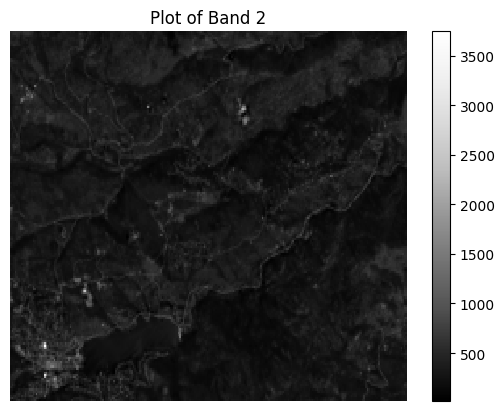

In [10]:
landsat_post_xr = open_clean_band(all_landsat_post_bands[0])

f, ax = plt.subplots()
landsat_post_xr.plot.imshow(cmap="Greys_r", ax=ax)
ax.set_title("Plot of Band 2")
ax.set_axis_off()
plt.show()

In [11]:
fire_boundary_path = os.path.join("cold-springs-fire", "vector_layers", "fire-boundary-geomac", "co_cold_springs_20160711_2200_dd83.shp")

fire_boundary = gpd.read_file(fire_boundary_path)

In [12]:
landsat_crs = es.crs_check(all_landsat_post_bands[0])

print(landsat_crs)
print(fire_boundary.crs)

EPSG:32613
EPSG:4269


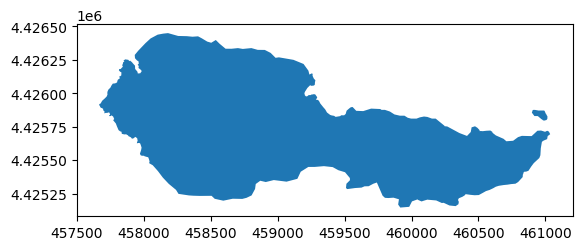

In [13]:
fire_boundary_utmz13 = fire_boundary.to_crs(landsat_crs)

fire_boundary_utmz13.plot()
plt.show()

In [14]:
landsat_post_xr_clip = rxr.open_rasterio(all_landsat_post_bands[0]).rio.clip(fire_boundary_utmz13.geometry, from_disk=True).squeeze()

landsat_post_xr_clip

<xarray.DataArray (y: 44, x: 113)> Size: 10kB
array([[-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       ...,
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768]], dtype=int16)
Coordinates:
  * x            (x) float64 904B 4.577e+05 4.577e+05 ... 4.61e+05 4.61e+05
  * y            (y) float64 352B 4.426e+06 4.426e+06 ... 4.425e+06 4.425e+06
    band         int64 8B 1
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  3743
    STATISTICS_MEAN:     337.61331587892
    STATISTICS_MINIMUM:  17
    STATISTICS_STDDEV:   139.84903539903
    scale_factor:        1.0
    add_offset:          0.0
    _FillValue:          -32768

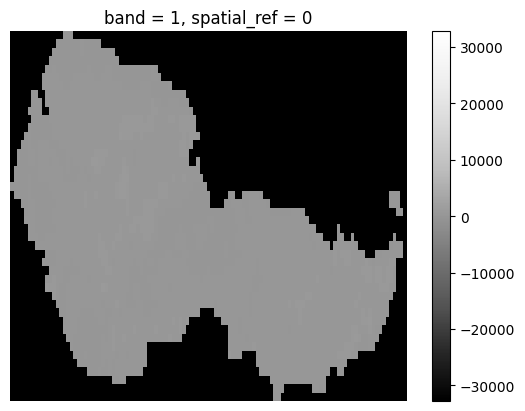

In [15]:
f, ax = plt.subplots()
landsat_post_xr_clip.plot.imshow(cmap="Greys_r", ax=ax)
ax.set_axis_off()
plt.show()

In [16]:
valid_range = (0,10000)

if valid_range:
    mask = ((landsat_post_xr_clip < valid_range[0]) | (
        landsat_post_xr_clip > valid_range[1]))
    landsat_post_xr_clip = landsat_post_xr_clip.where(~xr.where(mask, True, False))

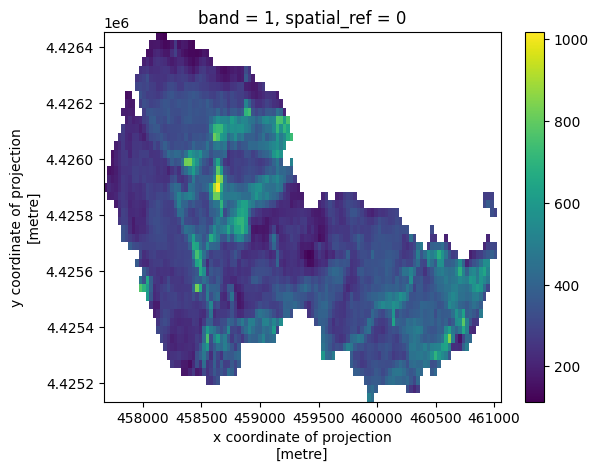

In [17]:
f, ax = plt.subplots() 
landsat_post_xr_clip.plot(ax=ax)
plt.show()

In [18]:
def open_clean_band(band_path, clip_extent, valid_range=None):
    try:
        clip_bound = clip_extent.geometry
    except Exception as err:
        print("Oops, I need a geodataframe object for this to work.")
        print(err)
    
    cleaned_band = rxr.open_rasterio(band_path, masked=True).rio.clip(clip_bound, from_disk=True).squeeze()

    if valid_range:
        mask = ((landsat_post_xr_clip < valid_range[0]) | (
            landsat_post_xr_clip > valid_range[1]))
        cleaned_band - landsat_post_xr_clip.where(~xr.where(mask, True, False))

    return cleaned_band

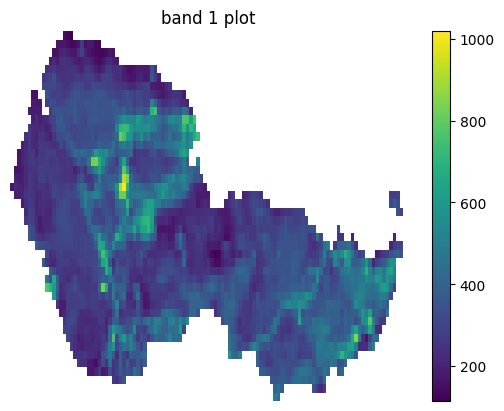

In [19]:
cleaned_band = open_clean_band(all_landsat_post_bands[0], fire_boundary_utmz13)

f, ax = plt.subplots()
cleaned_band.plot(ax=ax)
ax.set_title("band 1 plot")
ax.set_axis_off()
plt.show()

In [20]:
def process_bands(paths, crop_layer, stack=False):
    all_bands = []
    for i, aband in enumerate(paths):
        cleaned = open_clean_band(aband, crop_layer)
        cleaned["band"] = i+1
        all_bands.append(cleaned)
    
    if stack:
        print("I'm stacking your data now")
        return xr.concat(all_bands, dim="band")
    else:
        print("Return a list of xarray objects")
        return all_bands

In [21]:
fire_boundary_path = os.path.join("cold-springs-fire",
                                  "vector_layers",
                                  "fire-boundary-geomac",
                                  "co_cold_springs_20160711_2200_dd83.shp")

fire_boundary_path = gpd.read_file(fire_boundary_path)

In [22]:
all_landsat_post_bands = glob(os.path.join(landsat_post_fire_path, "*band[2-5]*.tif"))
all_landsat_post_bands.sort()
landsat_crs = es.crs_check(all_landsat_post_bands[0])
fire_boundary_utmz13 = fire_boundary.to_crs(landsat_crs)

In [23]:
post_fire_stack = process_bands(all_landsat_post_bands, fire_boundary_utmz13, stack=True)

post_fire_stack.shape

I'm stacking your data now


(4, 44, 113)

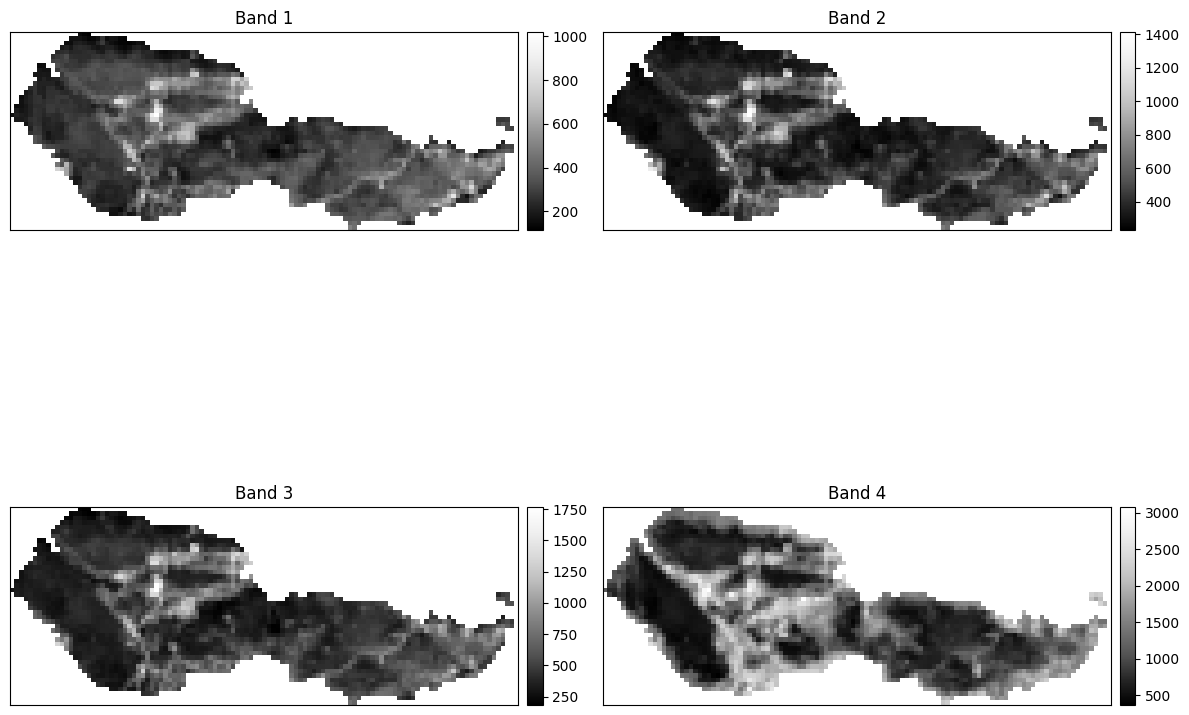

<Figure size 640x480 with 0 Axes>

In [24]:
band_titles = ["blue", "green", "red", "nir"]

ep.plot_bands(post_fire_stack, cols=2)
plt.suptitle("Cleaned and cropped landsat bands")
plt.show()